In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
file1 = pd.read_csv('listings.csv')

# Data cleaning

In [3]:
file1.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [4]:
# drop obvious unneccessary columns
cols_to_drop = ['id', 'listing_url', 'scrape_id', 'last_scraped', 
'picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 
'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'neighbourhood', 
'bathrooms', 'calendar_updated', 'calendar_last_scraped', 'license', 
'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']



In [5]:
df = file1.drop(columns=cols_to_drop, axis = 1)

In [6]:
df2 = df.drop(columns=['name', 'description', 'neighborhood_overview','host_verifications'])

In [7]:
df2.describe()

,host_id,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.492000e+03,4490.000000,4492.000000,4492.000000,4492.000000,4106.000000,4437.000000,4492.000000,4492.000000,4492.000000,...,2627.000000,2626.00000,2626.000000,2625.000000,2625.000000,4492.000000,4492.000000,4492.000000,4492.000000,2693.000000
mean,1.130739e+08,46.297327,1.313305,103.848675,2.961042,1.338042,1.887762,26.194568,942.041630,21.867320,...,9.062048,9.56131,9.546839,9.425524,9.005333,34.398041,19.166741,13.562333,0.353072,0.725295
std,1.046041e+08,70.779245,0.031250,0.040321,2.270319,0.705779,2.520077,50.960020,1544.043962,11.576673,...,1.234328,1.00487,1.016200,0.967003,1.179397,42.307671,34.442179,30.370156,1.420186,1.218463
min,2.277960e+05,0.000000,1.245300,103.646870,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,2.000000,2.00000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.537534e+07,2.000000,1.294878,103.838458,2.000000,1.000000,1.000000,2.000000,1120.000000,17.000000,...,9.000000,9.00000,9.000000,9.000000,9.000000,2.000000,0.000000,0.000000,0.000000,0.100000
50%,7.044263e+07,13.000000,1.310430,103.850065,2.000000,1.000000,1.000000,6.000000,1125.000000,29.000000,...,9.000000,10.00000,10.000000,10.000000,9.000000,12.000000,1.000000,1.000000,0.000000,0.270000
75%,1.782903e+08,54.000000,1.322265,103.862685,4.000000,1.000000,2.000000,28.000000,1125.000000,30.000000,...,10.000000,10.00000,10.000000,10.000000,10.000000,52.000000,16.000000,7.000000,0.000000,0.870000
max,3.733140e+08,300.000000,1.453280,103.973970,16.000000,8.000000,58.000000,1000.000000,100000.000000,30.000000,...,10.000000,10.00000,10.000000,10.000000,10.000000,137.000000,111.000000,135.000000,12.000000,22.560000


In [8]:
df2['neighbourhood_cleansed'].value_counts()

Kallang                    627
Novena                     419
Geylang                    400
Outram                     346
Rochor                     321
Downtown Core              306
Bukit Merah                215
Bedok                      211
River Valley               211
Singapore River            147
Queenstown                 120
Tanglin                     85
Orchard                     78
Toa Payoh                   74
Bukit Timah                 74
Clementi                    69
Hougang                     65
Newton                      65
Jurong West                 59
Marine Parade               54
Jurong East                 52
Woodlands                   52
Tampines                    47
Serangoon                   42
Bishan                      39
Sembawang                   38
Bukit Batok                 36
Pasir Ris                   29
Museum                      29
Southern Islands            26
Ang Mo Kio                  25
Yishun                      24
Sengkang

In [9]:
# check for null values
df2.isna().sum()
#  problem - many null values   - related to - host, reviews, bedrooms

host_id                                            0
host_since                                         2
host_location                                      4
host_response_time                               599
host_response_rate                               599
host_acceptance_rate                             621
host_is_superhost                                  2
host_total_listings_count                          2
host_has_profile_pic                               2
host_identity_verified                             2
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms_text                                    14
bedrooms                                      

In [10]:
# check review scores rating

df2['review_scores_rating'].mean()

91.24372623574145

In [11]:
df2['review_scores_rating'].describe()

count    2630.000000
mean       91.243726
std        11.297538
min        20.000000
25%        88.000000
50%        94.000000
75%       100.000000
max       100.000000
Name: review_scores_rating, dtype: float64

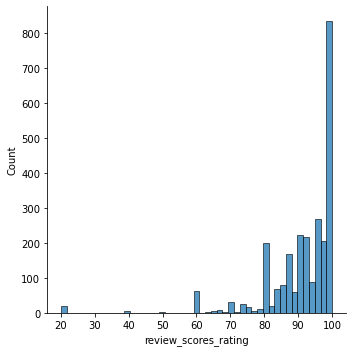

In [12]:
sns.displot(df2['review_scores_rating'])

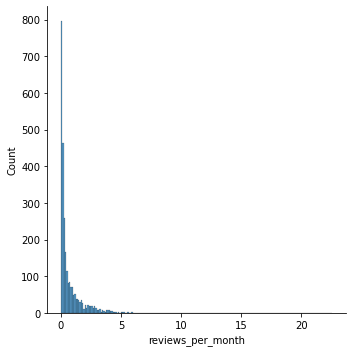

In [13]:
sns.displot(df2['reviews_per_month'])

In [14]:
# remove more irrelevant columns
df3 = df2.drop(columns=['host_since', 'host_has_profile_pic', 'host_id','first_review','last_review','host_id','host_location',
                       'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location','review_scores_value',
                       'host_has_profile_pic','amenities'])
df3.isna().sum()

host_response_time                               599
host_response_rate                               599
host_acceptance_rate                             621
host_is_superhost                                  2
host_total_listings_count                          2
host_identity_verified                             2
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms_text                                    14
bedrooms                                         386
beds                                              55
price                                              0
minimum_nights                                     0
maximum_nights                                

In [15]:
# latitude longtitude - could use as cluster later

In [16]:
df4 = df3.drop(columns=['latitude','longitude'])

In [17]:
# filling no reviews as 0 reviews
df4['review_scores_rating'].fillna(0, inplace=True)
df4['review_scores_rating'].isna().sum()
df4['review_scores_rating'] = np.where(df4['review_scores_rating'] == 0, 0, 1)

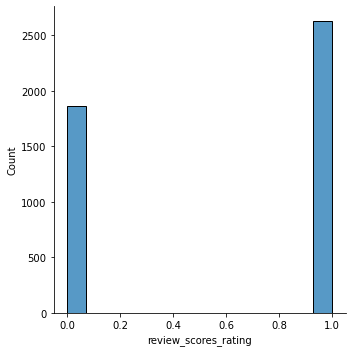

In [18]:
sns.displot(df4['review_scores_rating'])

In [19]:
# df4['reviews_per_month'].fillna(0, inplace=True)

# df4['reviews_per_month'] = np.where(df4['reviews_per_month'] == 0, 0, 1)
# df4['reviews_per_month'].value_counts()

In [20]:
df4.isna().sum()

host_response_time                               599
host_response_rate                               599
host_acceptance_rate                             621
host_is_superhost                                  2
host_total_listings_count                          2
host_identity_verified                             2
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms_text                                    14
bedrooms                                         386
beds                                              55
price                                              0
minimum_nights                                     0
maximum_nights                                     0
has_availability                                   0
availability_30                               

In [21]:
# bedrooms, beds, bathrooms_text
df4['bedrooms'].fillna(1, inplace=True)
df4['beds'].fillna(1, inplace=True)
df4['bathrooms_text'].fillna(0, inplace=True)

df4.isna().sum()

host_response_time                               599
host_response_rate                               599
host_acceptance_rate                             621
host_is_superhost                                  2
host_total_listings_count                          2
host_identity_verified                             2
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms_text                                     0
bedrooms                                           0
beds                                               0
price                                              0
minimum_nights                                     0
maximum_nights                                     0
has_availability                                   0
availability_30                               

In [22]:
# not able to distinguish private or public bathroom
df4 = df4.drop(columns=['bathrooms_text'])

In [23]:
df4.dtypes

host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_total_listings_count                       float64
host_identity_verified                           object
neighbourhood_cleansed                           object
neighbourhood_group_cleansed                     object
property_type                                    object
room_type                                        object
accommodates                                      int64
bedrooms                                        float64
beds                                            float64
price                                            object
minimum_nights                                    int64
maximum_nights                                    int64
has_availability                                 object
availability_30                                 

In [24]:
# response rate and acceptance rate, assign na to 0 

df4 = df4.astype({"host_response_rate": str})

df4['host_response_rate'] = df4['host_response_rate'].str[:-1]
df4['host_response_rate'] = pd.to_numeric(df4['host_response_rate'], errors='coerce')/100
df4['host_response_rate'].fillna(0, inplace=True)


In [25]:
df4 = df4.astype({"host_acceptance_rate": str})

df4['host_acceptance_rate'] = df4['host_acceptance_rate'].str[:-1]
df4['host_acceptance_rate'] = pd.to_numeric(df4['host_acceptance_rate'], errors='coerce')/100
df4['host_acceptance_rate'].fillna(0, inplace=True)


In [26]:
df4 = df4.astype({"price": str})
df4['price'] = df4['price'].str.lstrip('$')
# 1,000.00
df4['price'] = df4['price'].str.replace(',','')
df4 = df4.astype({"price": float})

# df5['price'] = pd.to_numeric(df5['price'], errors='coerce')


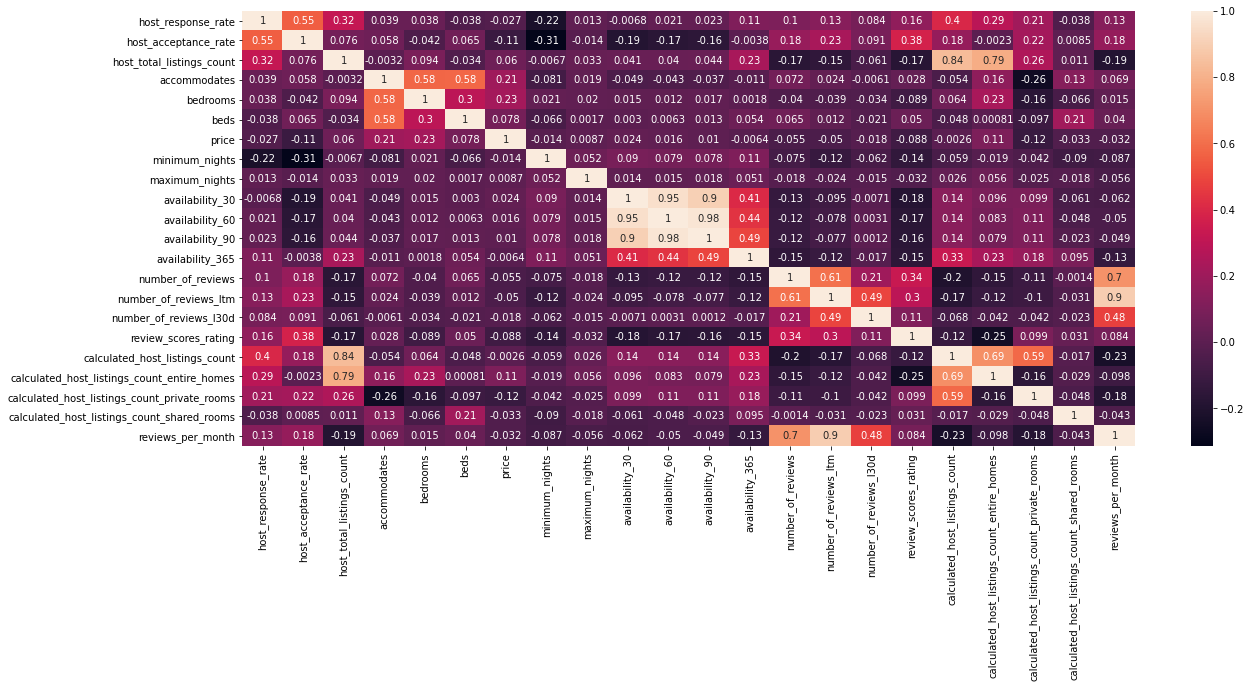

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix=df4.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [28]:
# drop more columns
df4['property_type'].value_counts()
#  too many types and main differentiator is entire or room
df4['has_availability'].value_counts()

df5 = df4.drop(columns= ['property_type', 'calculated_host_listings_count_entire_homes',
                        'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'has_availability',
                        'availability_30','availability_60','availability_90','availability_365','calculated_host_listings_count','minimum_nights',
                         'maximum_nights','accommodates','beds'])


In [29]:
df5['price'].isna().sum()

0

In [30]:
# cols related to host acceptance and reply
df5 = df5.drop(columns=['host_response_time','host_response_rate'])

In [31]:
df6 = df5.drop(columns=['number_of_reviews_l30d','number_of_reviews_ltm',
                        'number_of_reviews','reviews_per_month'])

In [32]:
# convert neighbourhood_cleansed to median price of neighbourhood
# append 
# get median price 
    
df_medians = df6.groupby([df['neighbourhood_cleansed']]).median()

dictionary_neighbourhood = {}
# df_medians
# row = df_medians.loc['Bedok']

for i in df_medians.index:
    dictionary_neighbourhood[i] = df_medians.loc[i].price
    
df6.replace({'neighbourhood_cleansed':dictionary_neighbourhood }, inplace=True)

df6


,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,bedrooms,price,review_scores_rating,instant_bookable
0,0.00,f,2.0,t,56.0,North Region,Private room,1.0,82.0,1,f
1,0.00,f,1.0,t,71.0,Central Region,Private room,1.0,80.0,1,f
2,0.00,f,2.0,t,56.0,North Region,Private room,1.0,68.0,1,f
3,1.00,f,8.0,t,80.0,East Region,Private room,2.0,179.0,1,t
4,1.00,f,8.0,t,80.0,East Region,Private room,1.0,95.0,1,t
...,...,...,...,...,...,...,...,...,...,...,...
4487,0.85,f,51.0,t,70.0,Central Region,Entire home/apt,1.0,146.0,0,f
4488,0.85,f,51.0,t,70.0,Central Region,Entire home/apt,1.0,134.0,0,f
4489,0.97,t,289.0,t,147.5,Central Region,Entire home/apt,1.0,120.0,0,f
4490,0.97,t,289.0,t,147.5,Central Region,Entire home/apt,1.0,120.0,0,f


In [33]:
df6.count()

host_acceptance_rate            4492
host_is_superhost               4490
host_total_listings_count       4490
host_identity_verified          4490
neighbourhood_cleansed          4492
neighbourhood_group_cleansed    4492
room_type                       4492
bedrooms                        4492
price                           4492
review_scores_rating            4492
instant_bookable                4492
dtype: int64

In [34]:
df6.isna().sum()

host_acceptance_rate            0
host_is_superhost               2
host_total_listings_count       2
host_identity_verified          2
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
room_type                       0
bedrooms                        0
price                           0
review_scores_rating            0
instant_bookable                0
dtype: int64

In [35]:
df6.dropna(inplace=True)

df6.isna().sum()

host_acceptance_rate            0
host_is_superhost               0
host_total_listings_count       0
host_identity_verified          0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
room_type                       0
bedrooms                        0
price                           0
review_scores_rating            0
instant_bookable                0
dtype: int64

In [36]:
df6

,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,bedrooms,price,review_scores_rating,instant_bookable
0,0.00,f,2.0,t,56.0,North Region,Private room,1.0,82.0,1,f
1,0.00,f,1.0,t,71.0,Central Region,Private room,1.0,80.0,1,f
2,0.00,f,2.0,t,56.0,North Region,Private room,1.0,68.0,1,f
3,1.00,f,8.0,t,80.0,East Region,Private room,2.0,179.0,1,t
4,1.00,f,8.0,t,80.0,East Region,Private room,1.0,95.0,1,t
...,...,...,...,...,...,...,...,...,...,...,...
4487,0.85,f,51.0,t,70.0,Central Region,Entire home/apt,1.0,146.0,0,f
4488,0.85,f,51.0,t,70.0,Central Region,Entire home/apt,1.0,134.0,0,f
4489,0.97,t,289.0,t,147.5,Central Region,Entire home/apt,1.0,120.0,0,f
4490,0.97,t,289.0,t,147.5,Central Region,Entire home/apt,1.0,120.0,0,f


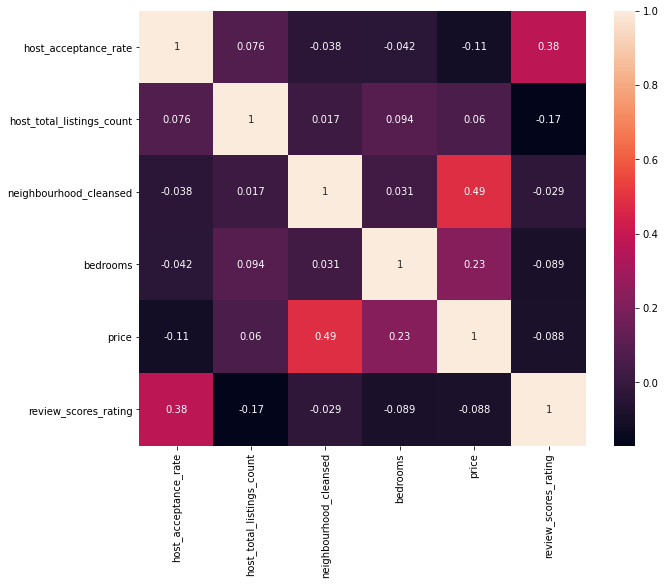

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix=df6.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [38]:
# Notes
# high correlation between availabilities
# high correlation between response rate and response time, drop response time
# high correlation review_scores_rating and reviews_per_month

In [39]:
df6.describe()

,host_acceptance_rate,host_total_listings_count,neighbourhood_cleansed,bedrooms,price,review_scores_rating
count,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000
mean,0.689004,46.297327,114.281737,1.308909,163.207127,0.585301
std,0.368353,70.779245,159.209388,0.681445,344.478740,0.492725
min,0.000000,0.000000,43.500000,1.000000,14.000000,0.000000
25%,0.392500,2.000000,79.000000,1.000000,61.000000,0.000000
50%,0.900000,13.000000,102.000000,1.000000,113.000000,1.000000
75%,0.970000,54.000000,145.000000,1.000000,170.000000,1.000000
max,1.000000,300.000000,10286.000000,8.000000,10286.000000,1.000000


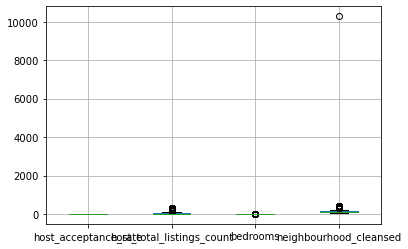

In [40]:
# Check outliers

df6[['host_acceptance_rate','host_total_listings_count', 'bedrooms','neighbourhood_cleansed' ]].boxplot()
plt.show()

# remove points above upperwhisker, these are professional hosts, and they dont seem to be correlated with price



In [41]:
df6 = df6[df6['neighbourhood_cleansed'] < (145 + 1.5*(145-79))]

In [42]:
df6 = df6[df6['host_total_listings_count'] < (54 + 1.5*(54-2))]

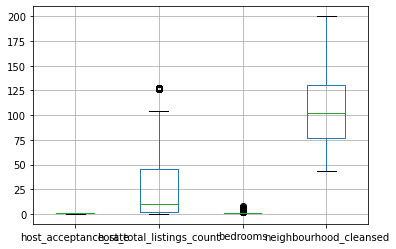

In [43]:
df6[['host_acceptance_rate','host_total_listings_count', 'bedrooms','neighbourhood_cleansed' ]].boxplot()
plt.show()

In [44]:
# df6.drop(columns=['neighbourhood_cleansed'], inplace=True)

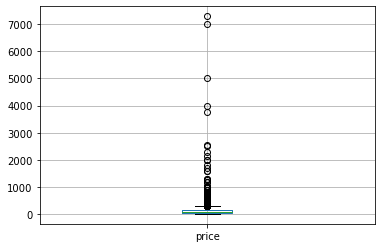

In [45]:
df6[['price']].boxplot()
plt.show()

In [46]:
df6 = df6[df6['price'] < (170+ 1.5*(170-61))]


In [47]:
# splitting the df in to > 100 , < 100 price points didnt improve the models 

In [48]:
df6['price']= np.log(df6[['price']])


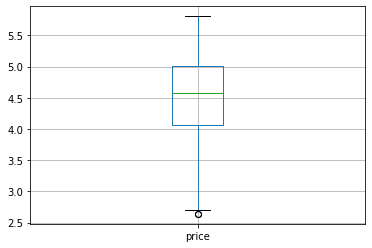

In [49]:
df6[['price']].boxplot()
plt.show()

In [50]:
# response time categorization
# df5['host_response_time'].value_counts()
# def clean_response_time(x):
#     if x == 'within an hour':
#         return 4
#     elif x == 'within a few hours':
#         return 3
#     elif x == 'within a day':
#         return 2
#     elif x == 'a few days or more':
#         return 1
#     else:
#         return 0
# df5['host_response_time']= list(map(clean_response_time, df5['host_response_time']))

# Numerical columns

In [51]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 0 to 4488
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_acceptance_rate          3833 non-null   float64
 1   host_is_superhost             3833 non-null   object 
 2   host_total_listings_count     3833 non-null   float64
 3   host_identity_verified        3833 non-null   object 
 4   neighbourhood_cleansed        3833 non-null   float64
 5   neighbourhood_group_cleansed  3833 non-null   object 
 6   room_type                     3833 non-null   object 
 7   bedrooms                      3833 non-null   float64
 8   price                         3833 non-null   float64
 9   review_scores_rating          3833 non-null   int64  
 10  instant_bookable              3833 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 359.3+ KB


In [52]:
df6_numerical = df6.select_dtypes(include='number').drop(columns=['review_scores_rating'])

df6_numerical

,host_acceptance_rate,host_total_listings_count,neighbourhood_cleansed,bedrooms,price
0,0.00,2.0,56.0,1.0,4.406719
1,0.00,1.0,71.0,1.0,4.382027
2,0.00,2.0,56.0,1.0,4.219508
3,1.00,8.0,80.0,2.0,5.187386
4,1.00,8.0,80.0,1.0,4.553877
...,...,...,...,...,...
4482,0.85,51.0,70.0,1.0,4.941642
4484,0.85,51.0,70.0,1.0,4.852030
4485,0.85,51.0,70.0,1.0,5.023881
4487,0.85,51.0,70.0,1.0,4.983607


In [53]:
df6_numerical.describe()

,host_acceptance_rate,host_total_listings_count,neighbourhood_cleansed,bedrooms,price
count,3833.000000,3833.000000,3833.000000,3833.000000,3833.000000
mean,0.707670,28.645447,104.587008,1.249152,4.506224
std,0.367995,36.069186,32.942508,0.629200,0.670134
min,0.000000,0.000000,43.500000,1.000000,2.639057
25%,0.540000,2.000000,75.000000,1.000000,4.060443
50%,0.900000,10.000000,102.000000,1.000000,4.574711
75%,0.980000,48.000000,131.000000,1.000000,5.003946
max,1.000000,127.000000,200.000000,8.000000,5.808142


In [54]:
# check correlations of categorical cols

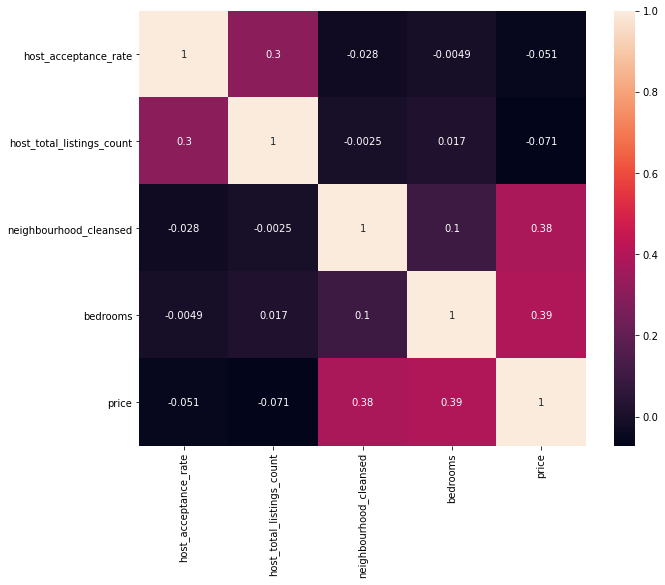

In [55]:
corr_matrix=df6_numerical.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

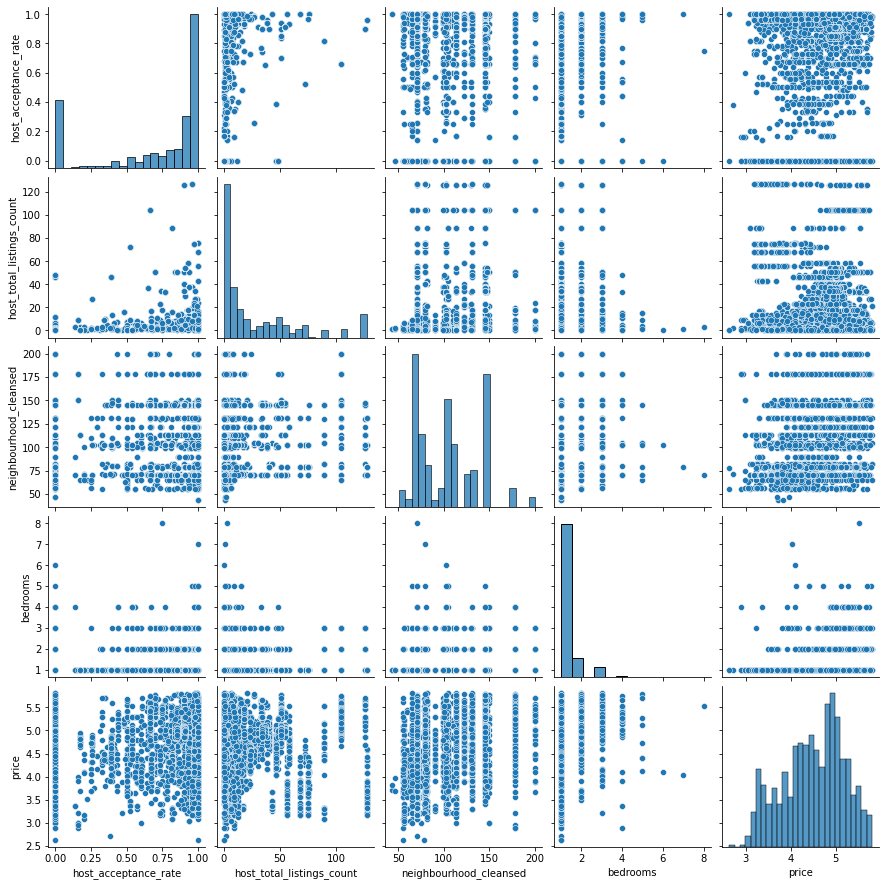

In [56]:
sns.pairplot(df6_numerical)

# Categorical columns

In [57]:
df6_cat = df6.select_dtypes(include='object')
df6_cat

,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,room_type,instant_bookable
0,f,t,North Region,Private room,f
1,f,t,Central Region,Private room,f
2,f,t,North Region,Private room,f
3,f,t,East Region,Private room,t
4,f,t,East Region,Private room,t
...,...,...,...,...,...
4482,f,t,Central Region,Entire home/apt,f
4484,f,t,Central Region,Entire home/apt,f
4485,f,t,Central Region,Entire home/apt,t
4487,f,t,Central Region,Entire home/apt,f


In [58]:
df6_cat['room_type'].value_counts()

Private room       1970
Entire home/apt    1470
Hotel room          226
Shared room         167
Name: room_type, dtype: int64

In [59]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(handle_unknown='error').fit(df6_cat[['room_type']])
# encoded = encoder.transform(df6_cat[['room_type']]).toarray()
# df_room_type= pd.DataFrame(encoded)
# df_room_type

In [60]:
df6_categorical = pd.get_dummies(df6_cat)

In [61]:
df6_categorical = pd.concat([df6_categorical, df6['review_scores_rating']], axis=1)
df6_categorical

,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t,neighbourhood_group_cleansed_Central Region,neighbourhood_group_cleansed_East Region,neighbourhood_group_cleansed_North Region,neighbourhood_group_cleansed_North-East Region,neighbourhood_group_cleansed_West Region,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t,review_scores_rating
0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1
1,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1
2,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1
3,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1
4,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0
4484,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0
4485,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
4487,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0


# Data exploration


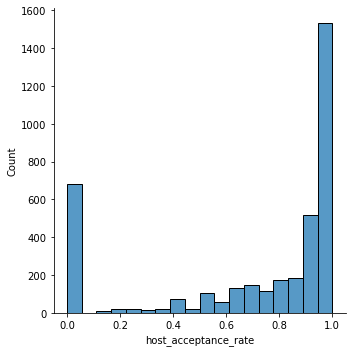

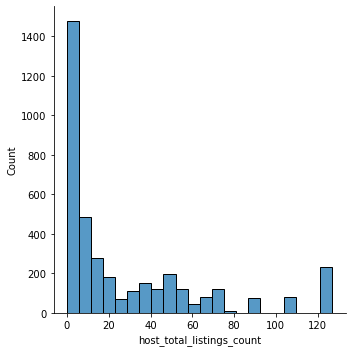

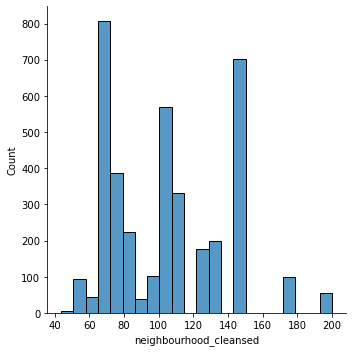

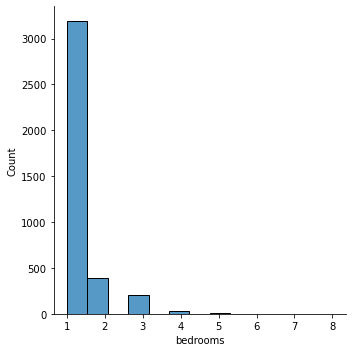

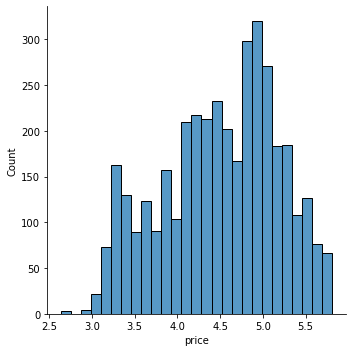

In [62]:
for i in df6_numerical:
    sns.displot(df6_numerical[i])

In [63]:
# all very skewed

In [64]:
y = df6['price']
y

0       4.406719
1       4.382027
2       4.219508
3       5.187386
4       4.553877
          ...   
4482    4.941642
4484    4.852030
4485    5.023881
4487    4.983607
4488    4.897840
Name: price, Length: 3833, dtype: float64

In [65]:
X_numerical = df6_numerical.drop(columns=['price'])

X = pd.concat([df6_categorical, X_numerical], axis=1)

df6= pd.concat([df6_categorical, df6_numerical], axis=1)

In [66]:
# check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['variable'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


display(vif)

,variable,VIF
0,host_is_superhost_f,inf
1,host_is_superhost_t,inf
2,host_identity_verified_f,inf
3,host_identity_verified_t,inf
4,neighbourhood_group_cleansed_Central Region,inf
5,neighbourhood_group_cleansed_East Region,inf
6,neighbourhood_group_cleansed_North Region,inf
7,neighbourhood_group_cleansed_North-East Region,inf
8,neighbourhood_group_cleansed_West Region,inf
9,room_type_Entire home/apt,inf


In [67]:
# corr_matrix=df6.corr(method='pearson')  # default
# fig, ax = plt.subplots(figsize=(20, 8))
# ax = sns.heatmap(corr_matrix, annot=True)
# plt.show()

In [68]:
X

,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t,neighbourhood_group_cleansed_Central Region,neighbourhood_group_cleansed_East Region,neighbourhood_group_cleansed_North Region,neighbourhood_group_cleansed_North-East Region,neighbourhood_group_cleansed_West Region,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t,review_scores_rating,host_acceptance_rate,host_total_listings_count,neighbourhood_cleansed,bedrooms
0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0.00,2.0,56.0,1.0
1,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0.00,1.0,71.0,1.0
2,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0.00,2.0,56.0,1.0
3,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,1.00,8.0,80.0,2.0
4,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,1.00,8.0,80.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0.85,51.0,70.0,1.0
4484,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0.85,51.0,70.0,1.0
4485,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0.85,51.0,70.0,1.0
4487,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0.85,51.0,70.0,1.0


# Training model

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled  = scaler.transform(X_test)

In [71]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression()

model = lm.fit(X_train_scaled, y_train)

# using X test scaled to predict log of predictions (price have been logged before)
log_predictions  = lm.predict(X_test_scaled)

# convert to real predictions
real_predictions = np.exp(log_predictions)

mse = mean_squared_error(np.exp(y_test), real_predictions)
rmse = mean_squared_error(np.exp(y_test), real_predictions,squared=False)

print(rmse)

r2 = r2_score(np.exp(y_test), real_predictions)

print(r2)

53.24093981151845
0.40075029936946616


In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# poly = PolynomialFeatures(degree=2)

<AxesSubplot:ylabel='price'>

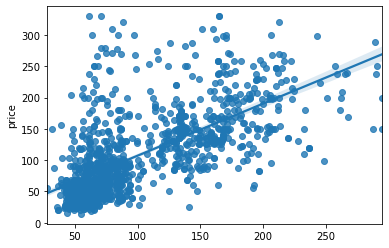

In [73]:
sns.regplot(real_predictions,np.exp(y_test))

In [74]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

X_scaled_sm = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train,X_scaled_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     189.8
Date:                Fri, 04 Dec 2020   Prob (F-statistic):               0.00
Time:                        08:39:45   Log-Likelihood:                -1731.2
No. Observations:                2683   AIC:                             3494.
Df Residuals:                    2667   BIC:                             3589.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5180      0.009    505.782      0.0

In [75]:
# x1 is insignificant, p value is larger than the threshold


In [76]:
# KNN

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

lm = KNeighborsRegressor(n_neighbors=4)

model = lm.fit(X_train_scaled, y_train)

# predict
log_predictions  = lm.predict(X_test_scaled)
real_predictions = np.exp(log_predictions)

mse = mean_squared_error(np.exp(y_test), real_predictions)
rmse = mean_squared_error(np.exp(y_test), real_predictions,squared=False)

print(rmse)

r2 = r2_score(np.exp(y_test), real_predictions)

print(r2)

47.00263090162968
0.532952840817283


In [77]:
# random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

lm = RandomForestRegressor(random_state=0)

model = lm.fit(X_train_scaled, y_train)

# predict
log_predictions  = lm.predict(X_test_scaled)
real_predictions = np.exp(log_predictions)

mse = mean_squared_error(np.exp(y_test), real_predictions)
rmse = mean_squared_error(np.exp(y_test), real_predictions,squared=False)

print(rmse)

r2 = r2_score(np.exp(y_test), real_predictions)

print(r2)

44.21461548913635
0.5867164639047668


In [78]:
# Random forest has highest R2

# Improving the model


In [79]:
# incorporate location data latitude longtitude

In [80]:
# User interaction
# ask user for details on property listing

# Test
# review rating as categorical - not much difference

# add neighborhood median price


# Test results
# using 2 models for price < 100 and price > 100 didnt improve the model
